# SW 02 Exercises Solutions

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf

import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '..', 'notebooks'))

from utils import get_figure

np.random.seed(42)

## Part 1: Extend lecture 1 & 2 exercises with stationarity analysis

Nevin

## Part 2: Make the time series stationary

Maiko

## Part 3: Explore artificial auto-correlations induced by differencing

We take the weak stationary time series from the lecture and apply first to fourth order differencing.

When we compare the ACF plots, we can see that the differencing induces artificial auto-correlations.
While the spike at lag 0 is expected, we can see that the spikes at higher lags get more pronounced with higher order differencing. This is especially visible at lag 1 and lag 2 which are ever growing.

Because the time series is already stationary, we don't need to difference it at all.

In [4]:
n = 400
weak_stationary_series = np.zeros(n)
w = np.random.normal(0, 1, n)
weak_stationary_series[0] = w[0]
for t in range(1, n):
    weak_stationary_series[t] = 0.8 * weak_stationary_series[t - 1] + w[t]

weak_stationary_series = pd.Series(weak_stationary_series)

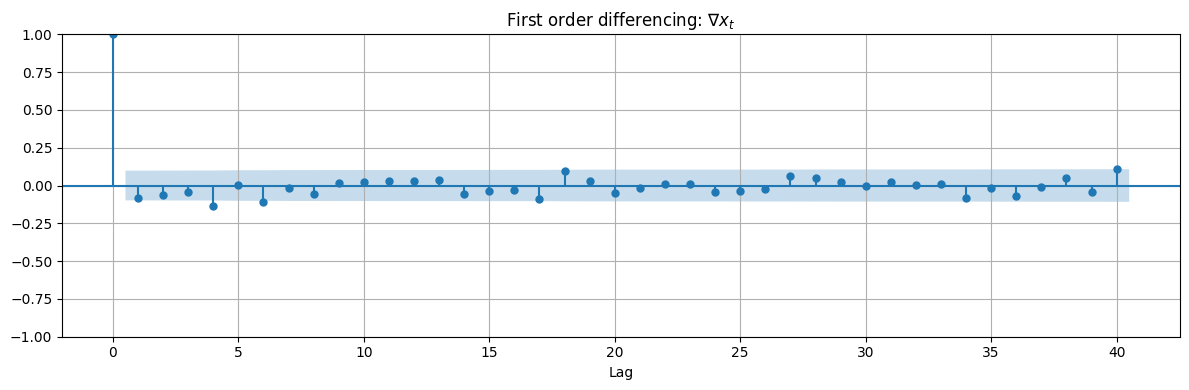

In [11]:
first_order_differenced = weak_stationary_series.diff().dropna()

fig, [ax] = get_figure()
plot_acf(first_order_differenced, lags=40, ax=ax)
ax.set_title("First order differencing: $\\nabla x_t$")
ax.set_xlabel("Lag")
ax.set_ylabel='$\\nabla x_t$'
fig.tight_layout()

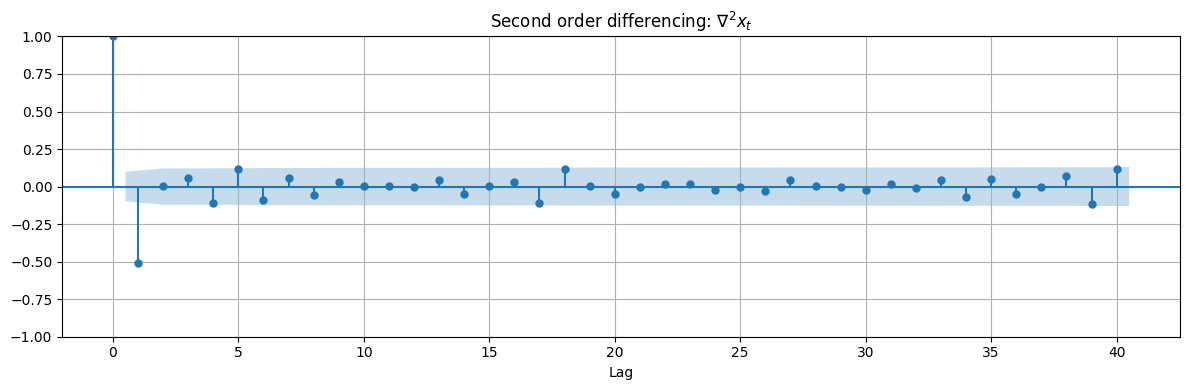

In [12]:
second_order_differenced = first_order_differenced.diff().dropna()

fig, [ax] = get_figure()
plot_acf(second_order_differenced, lags=40, ax=ax)
ax.set_title("Second order differencing: $\\nabla^2 x_t$")
ax.set_xlabel("Lag")
ax.set_ylabel='$\\nabla^2 x_t$'
fig.tight_layout()

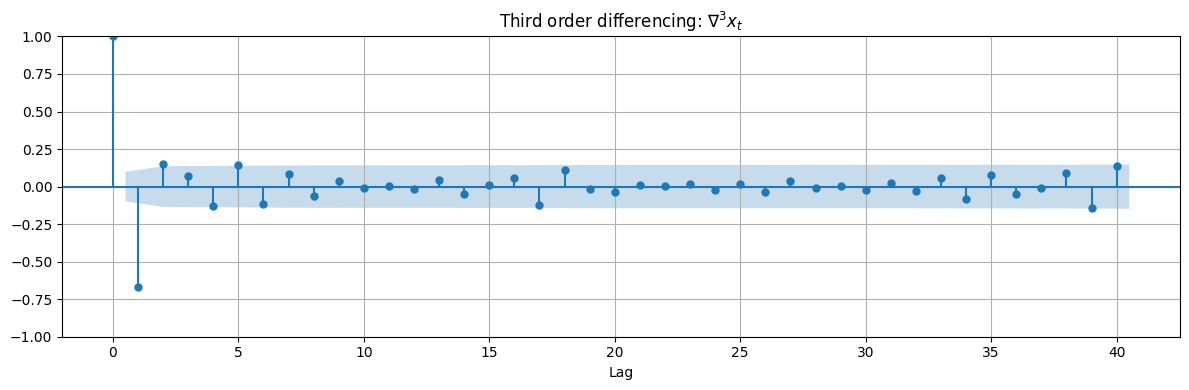

In [13]:
third_order_differenced = second_order_differenced.diff().dropna()
fig, [ax] = get_figure()
plot_acf(third_order_differenced, lags=40, ax=ax)
ax.set_title("Third order differencing: $\\nabla^3 x_t$")
ax.set_xlabel("Lag")
ax.set_ylabel='$\\nabla^3 x_t$'
fig.tight_layout()

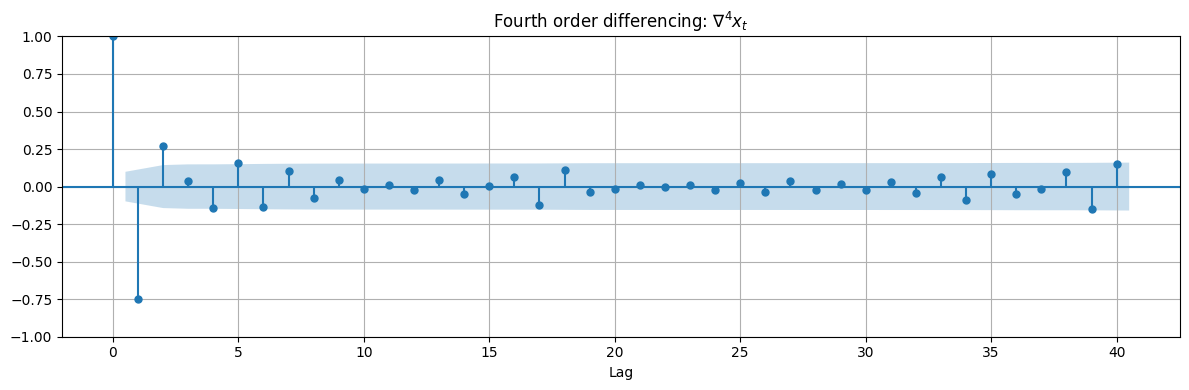

In [14]:
fourth_order_differenced = third_order_differenced.diff().dropna()
fig, [ax] = get_figure()
plot_acf(fourth_order_differenced, lags=40, ax=ax)
ax.set_title("Fourth order differencing: $\\nabla^4 x_t$")
ax.set_xlabel("Lag")
ax.set_ylabel='$\\nabla^4 x_t$'
fig.tight_layout()